# Определение перспективного тарифа для телеком-компании

В компании "Мегалайн" (федеральный оператор сотовой связи) клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель работы:** проанализировать поведение клиентов и выяснить, какой тариф приносит большую прибыль.

**Ход исследования:**
1. Изучение данных из файлов;
2. Подготовка данных:
  * Удаление столбцов;
  * Замена типов данных;
  * Поиск и исправление ошибок;
  * Расчеты;
3. Анализ данных;
4. Проверка гипотез:
  * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
  * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных из файлов

Откроем и изучим предоставленные файлы.

In [1]:
#импорт библиотеки pandas
import pandas as pd
#чтение файла calls.csv и сохранение в переменную calls
calls = pd.read_csv('/datasets/calls.csv')
#вывод первых 5 строк на экран
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
#получение информации о данных
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица `calls` содержит информацию о звонках и состоит из 4 столбцов:
* `id` - уникальный номер звонка, тип данных - `object`;
* `call_date` - дата звонка, тип данных - `object`;
* `duration` - длительность звонка в минутах, тип данных - `float`;
* `user_id` - идентификатор пользователя, сделавшего звонок, тип данных - `int`.

Размеры столбцов совпадают с количеством строк, следовательно, пропусков в таблице нет. 

In [3]:
#чтение файла internet.csv и сохранение в переменную internet, вывод первых 5 строк на экран
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
#получение информации о данных
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица `internet` содержит информацию об интернет-сессиях и состоит из 4 столбцов:
* `id` - уникальный номер сессии, тип данных - `object`;
* `mb_used` - объём потраченного за сессию интернет-трафика (в мегабайтах), тип данных - `float`;
* `session_date` - дата интернет-сессии, тип данных - `object`;
* `user_id` - идентификатор пользователя, тип данных - `int`.

Столбец `Unnamed: 0` повторяет индексацию таблицы, его можно удалить.

Размеры всех столбцов и количество строк одинаковы, значит, пропусков в таблице нет.

In [5]:
#чтение файла messages.csv и сохранение в переменную messages, вывод первых 5 строк на экран
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
#получение информации о данных
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `messages` содержит информацию о сообщениях и состоит из 3 столбцов:
* `id` - уникальный номер сообщения, тип данных - `object`;
* `message_date` - дата сообщения, тип данных - `object`;
* `user_id` - идентификатор пользователя, отправившего сообщение, тип данных - `int`.

Пропусков в таблице нет, так как количество записей и размеры столбцов совпадают.

In [7]:
#чтение файла tariffs.csv и сохранение в переменную tariffs, вывод на экран
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
#получение информации о данных
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица `tariffs` содержит информацию о тарифах и состоит из 8 столбцов:
* `messages_included` - количество сообщений в месяц, включённых в абонентскую плату, тип данных - `int`;
* `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах), тип данных - `int`;
* `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату, тип данных - `int`;
* `rub_monthly_fee` - ежемесячная абонентская плата в рублях, тип данных - `int`;
* `rub_per_gb` - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета, тип данных - `int`;
* `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета, тип данных - `int`;
* `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета, тип данных - `int`;
* `tariff_name` - название тарифа, тип данных - `object`.

Оператор предлоставляет два тарифных плана:
* `"Смарт"`
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей


* `"Ультра"`
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 1 рубль
  * сообщение: 1 рубль
  * 1 Гб интернет-трафика: 150 рублей

In [9]:
#чтение файла users.csv и сохранение в переменную users, вывод на экран первых 5 строк
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
#получение информации о данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `users` содержит информацию о пользователях и состоит из 8 столбцов:
* `user_id` - уникальный идентификатор пользователя, тип данных - `int`;
* `age` - возраст пользователя (годы), тип данных - `int`;
* `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), тип данных - `object`;
* `city` - город проживания пользователя, тип данных - `object`;
* `first_name` - имя пользователя, тип данных - `object`;
* `last_name` - фамилия пользователя, тип данных - `object`;
* `reg_date` - дата подключения тарифа (день, месяц, год), тип данных - `object`;
* `tariff` - название тарифного плана, тип данных - `object`.

Пропусков в таблице нет, кроме столбца `churn_date`, но это означает, что клиент все еще пользуется тарифом.

### Вывод

На данном этапе были прочитаны и изучены 5 предоставленных файлов:
* `calls.csv` - информация о звонках;
* `internet.csv` - информация об интернет-сессиях;
* `messages.csv` - информация о сообщениях;
* `tariffs.csv` - информация о тарифах;
* `users.csv` - информация о пользователях.

1. Для столбца `call_date` таблицы `calls` нужно изменить тип данных на `datetime`.
2. Для столбца `session_date` таблицы `internet` нужно изменить тип данных на `datetime`, а столбец `Unnamed: 0` удалить, так как он повторяет индексацию таблицы.
3. Для столбца `message_date` таблицы `messages` нужно изменить тип данных на `datetime`.
4. Для столбцов `churn_date` и `reg_date` таблицы `users` нужно изменить тип данных на `datetime`.

## Подготовка данных

### Удаление столбцов

На предыдущем шаге было решено удалить столбец `Unnamed: 0` таблицы `internet`.

In [11]:
#удаление столбца, вывод обновленной информации
internet = internet.drop(columns='Unnamed: 0', axis=1)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


### Замена типов данных

Заменим на `datetime` типы данных столбцов `call_date` таблицы `calls`, `session_date` таблицы `internet`, `message_date` таблицы `messages`, `churn_date` и `reg_date` таблицы `users`.

In [12]:
#замена типа данных на datetime и проверка изменения
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [13]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [15]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Поиск и исправление ошибок

Рассмотрим каждую таблицу для поиска ошибок в данных, начнем с таблицы `calls`.

In [16]:
#вывод первых 5 строк
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Посмотрим, есть ли дубликаты в таблице.

In [17]:
calls.duplicated().unique()

array([False])

Дубликаты не были найдены. Для таблицы `calls` ошибки могли возникнуть в столбце с продолжительностью звонка. В случае нулевой продолжительности звонка ошибки нет - это пропущенные звонки. Посмотрим, есть ли слишком большие или отрицательные значения в столбце.

In [18]:
#сортировка столбца duration по убыванию
calls['duration'].sort_values(ascending=False)

95088     38.00
178737    37.35
5865      36.47
39777     36.12
60889     35.95
          ...  
45132      0.00
144950     0.00
144952     0.00
45127      0.00
0          0.00
Name: duration, Length: 202607, dtype: float64

Самая большая продолжительность звонка 38 минут, отрицательных значений в столбце нет, следовательно, ошибок в таблице `calls` нет.

Рассмотрим таблицу `internet`.

In [19]:
#вывод первых 5 строк
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Найдем дубликаты в таблице.

In [20]:
internet.duplicated().unique()

array([False])

В таблице нет дубликатов. Посмотрим, какие есть значения объема трафика в таблице.

In [21]:
#сортировка столбца mb_used по убыванию
internet['mb_used'].sort_values(ascending=False)

137493    1724.83
119156    1702.75
7063      1651.55
103480    1651.25
140299    1623.92
           ...   
118555       0.00
112336       0.00
118557       0.00
15836        0.00
115856       0.00
Name: mb_used, Length: 149396, dtype: float64

Самое большое значение - 1724.83, что вполне правдоподобно, а самое маленькое - 0, скорее всего, это те интернет-сессии, которые были завершены сразу же после начала, либо попытки выхода в интернет с отсутствием подключения к интернету. 

Рассмотрим таблицу `messages`.

In [22]:
#вывод первых 5 строк
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверим на наличие дубликатов.

In [23]:
messages.duplicated().unique()

array([False])

Дубликатов нет. Таблица `messages` содержит только идентификатор пользователя, идентификатор сообщения и дату отправки, потому там вряд ли есть ошибки.

Таблица `tariffs` содержит данные о тарифах, ошибок в ней точно нет.

Рассмотрим таблицу `users`. 

In [24]:
#вывод первых 5 строк
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим, есть ли в таблице дубликаты.

In [25]:
users.duplicated().unique()

array([False])

В таблице нет дубликатов. В столбце `churn_date` есть пропуски, но это значит, что клиент все еще пользуется тарифом. Проверим, есть ли ошибки в возрасте пользователей.

In [26]:
#сортировка столбца age и вывод уникальных значений
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Возраст пользователей от 18 до 75 лет, что похоже на правду. Ошибок в таблице `users` нет.

### Расчеты

1. Посчитаем количество звонков и израсходованных минут разговора для каждого пользователя по месяцам. Для начала добавим в таблицу `calls` столбец `month` с месяцем звонка, а затем создадим две сводные таблицы: первая с количеством звонков каждого клиента по месяцам, вторая - с суммарной длительностью разговора по месяцам для каждого пользователя. 

In [27]:
#добавляем столбец month
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Оператор всегда округляет вверх продолжительность звонка до целых минут, потому округлим значения в столбце `duration`.

In [28]:
import numpy as np
#округляем количество минут вверх
calls['duration'] = np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Создаем сводные таблицы.

In [29]:
#создаем сводную таблицу с количеством звонков
#user_id и month будут индексами для дальнейшего удобства в подсчете помесячной выручки
calls_count = calls.pivot_table(index=['user_id','month'],
                                values='duration',
                                aggfunc='count')
calls_count.head(10)

duration
user_id month          
1000    5            22
        6            43
        7            47
        8            52
        9            58
        10           57
        11           43
        12           46
1001    11           59
        12           63

In [30]:
#создаем сводную таблицу с израсходованными минутами
calls_sum = calls.pivot_table(index=['user_id','month'],
                              values='duration',
                              aggfunc='sum')
calls_sum.head(10)

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
        10        350.0
        11        338.0
        12        333.0
1001    11        430.0
        12        414.0

2. Вычислим количество отправленных сообщений каждым пользователем по месяцам. Для этого добавим столбец `month` с номером месяца в таблицу `messages`, а затем создадим сводную таблицу с количеством сообщений по месяцам.

In [31]:
#добавление столбца month
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
#создание сводной таблицы с количеством отправленных сообщений
messages_count = messages.pivot_table(index=['user_id','month'],
                                      values='id',
                                      aggfunc='count')
#переименование столбца с количеством сообщений 
messages_count = messages_count.rename(columns={'id': 'messages'})
messages_count.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

3. Посчитаем объем израсходованного каждым пользователем интернет-трафика по месяцам. Добавим столбец `month` в таблицу `internet`, создадим сводную таблицу с количеством потраченных мегабайт.

In [33]:
#добавление столбца month
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [34]:
#создание сводной таблицы с израсходованным объемом трафика
internet_sum = internet.pivot_table(index=['user_id','month'],
                                    values='mb_used',
                                    aggfunc='sum')
internet_sum.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

4. Теперь вычислим помесячную выручку с каждого пользователя. Для начала объединим таблицы `calls_sum`, `messages_count`, `internet_sum`, `users` и `tariffs` в одну таблицу с помощью метода `merge`, атрибут `how` будет принимать значение `outer`, потому что нам нужны все данные из всех таблиц.

In [35]:
#объединение таблиц calls_sum и messages_count в таблицу income
income = calls_sum.merge(messages_count, on=['user_id', 'month'], how='outer')
#присоединяем к income таблицу internet_sum, убираем мультииндекс
income = income.merge(internet_sum, on=['user_id', 'month'], how='outer').reset_index()
#присоединяем к income таблицу users
income = income.merge(users, on='user_id', how='outer')
#присоединяем к income таблицу tariffs
income = income.merge(tariffs, left_on='tariff', right_on='tariff_name', how='outer')
#заменяем пустые значения в столбцах duration, messages, mb_used на 0
income.loc[:, 'duration':'mb_used'] = income.loc[:, 'duration':'mb_used'].fillna(0)
income.head()

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


Создадим функцию, которая для каждой строки будет возвращать значение прибыли с каждого пользователя за месяц. 

In [36]:
#функция возвращает значение выручки за месяц, 
#сначала вычисляется прибыль за количество минут, сообщений и трафика(в гигабайтах),
#потраченных сверх тарифа, затем прибавляется ежемесячная плата
def total_income(row):
    total = np.maximum(row['duration'] - row['minutes_included'], 0) * row['rub_per_minute']
    total += np.maximum(row['messages'] - row['messages_included'], 0) * row['rub_per_message']
    #округляем трафик до целых Гб
    total += np.ceil(np.maximum(row['mb_used'] - row['mb_per_month_included'], 0) / 1024) * row['rub_per_gb']
    total += row['rub_monthly_fee']
    return total
    
income['total_income'] = income.apply(total_income, axis=1)  
income.head(10)

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_income
0,1000,5.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
5,1000,10.0,350.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
6,1000,11.0,338.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
7,1000,12.0,333.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
8,1003,8.0,380.0,37.0,8565.21,23,NaT,Москва,Белла,Белякова,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
9,1003,9.0,961.0,91.0,12468.87,23,NaT,Москва,Белла,Белякова,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


Соберем финальную таблицу со значением выручки с каждого пользователя за каждый месяц.

In [37]:
#создание сводной таблицы с прибылью с пользователей за месяц
income_pivot = income.pivot_table(index='user_id', columns='month', values='total_income')
#приведем месяцы к типу int
income_pivot.columns = income_pivot.columns.astype('int')
income_pivot.head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,550.0
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1005,550.0,550.0,886.0,1186.0,835.0,886.0,775.0,949.0,556.0,1219.0,694.0,838.0
1006,NaN,550.0,950.0,550.0,550.0,550.0,1550.0,1350.0,750.0,1550.0,550.0,1350.0
1007,NaN,NaN,NaN,550.0,1150.0,685.0,981.0,1750.0,1015.0,550.0,990.0,550.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0


Также посчитаем среднюю помесячную выручку с каждого пользователя для каждого тарифа.

In [38]:
#создание сводной таблицы со средней выручкой для тарифа "Смарт"
income_smart_mean = income[income['tariff']=='smart'].pivot_table(columns='month', 
                                              values='total_income', 
                                              aggfunc='mean')
income_smart_mean.columns = income_smart_mean.columns.astype('int')
income_smart_mean

month,1,2,3,4,5,6,7,8,9,10,11,12
total_income,721.323529,827.603448,1164.623377,963.089286,1197.510638,1204.018293,1223.950249,1320.595745,1249.946154,1364.853741,1343.047468,1578.531157


In [39]:
#создание сводной таблицы со средней выручкой для тарифа "Ультра"
income_ultra_mean = income[income['tariff']=='ultra'].pivot_table(columns='month', 
                                              values='total_income', 
                                              aggfunc='mean')
income_ultra_mean.columns = income_smart_mean.columns.astype('int')
income_ultra_mean

month,1,2,3,4,5,6,7,8,9,10,11,12
total_income,1950.0,1975.0,2014.864865,2001.818182,2059.701493,2039.285714,2118.131868,2083.17757,2024.347826,2065.853659,2092.164179,2138.848921


Из полученных таблиц можно сделать вывод, что тариф "Ультра" приносит большую выручку каждый месяц с одного пользователя, чем тариф "Смарт".

### Вывод

На данном этапе:
1. Был удален столбец `Unnamed: 0` таблицы `internet`.
2. Были заменены на `datetime` типы данных столбцов `call_date` таблицы `calls`, `session_date` таблицы `internet`, `message_date` таблицы `messages`, `churn_date` и `reg_date` таблицы `users`.
3. Для каждого пользователя были посчитаны:
  * количество сделанных звонков и израсходованных минут разговора по месяцам;
  * количество отправленных сообщений по месяцам;
  * объем израсходованного интернет-трафика по месяцам;
  * помесячная выручка с каждого пользователя.
4. Была посчитана средняя выручка с каждого пользователя в месяц для каждого тарифа, был сделан вывод, что тариф "Ультра" приносит большую выручку в месяц, чем тариф "Смарт".

## Анализ данных

Для каждого тарифа опишем поведение клиентов. Посмотрим, сколько минут разговора, сообщений и объем трафика требуется ежемесячно пользователям каждого тарифа. 

### Минуты разговора

Вычислим среднее количество, дисперсию и стандартное отклонение для каждого тарифа. Так как нам доступна не генеральная совокупность, а выборка, то будем считать несмещенную оценку для дисперсии и для стандартного отклонения.

* Тариф "Смарт"

In [40]:
#выделение данных о тарифе "Смарт"
smart = income[income['tariff']=='smart']
smart.head()

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_income
986,1001,11.0,430.0,0.0,18429.34,41,NaT,Москва,Иван,Ежов,...,smart,50,15360,500,550,200,3,3,smart,1150.0
987,1001,12.0,414.0,0.0,14036.66,41,NaT,Москва,Иван,Ежов,...,smart,50,15360,500,550,200,3,3,smart,550.0
988,1002,6.0,117.0,4.0,10856.82,59,NaT,Стерлитамак,Евгений,Абрамович,...,smart,50,15360,500,550,200,3,3,smart,550.0
989,1002,7.0,214.0,11.0,17580.10,59,NaT,Стерлитамак,Евгений,Абрамович,...,smart,50,15360,500,550,200,3,3,smart,1150.0
990,1002,8.0,289.0,13.0,20319.26,59,NaT,Стерлитамак,Евгений,Абрамович,...,smart,50,15360,500,550,200,3,3,smart,1550.0


In [41]:
#среднее количество минут для тарифа "Смарт"
smart['duration'].mean()

417.747533632287

In [42]:
#дисперсия для тарифа "Смарт"(т.к. у нас в распоряжении только выборка, то ddof=1)
np.var(smart['duration'], ddof=1)

36281.39383644458

In [43]:
#стандартное отклонение для тарифа "Смарт"
np.std(smart['duration'], ddof=1)

190.4767540579285

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Смарт".

In [44]:
print(smart['duration'].mean() - 3 * np.std(smart['duration'], ddof=1), 
      smart['duration'].mean() + 3 * np.std(smart['duration'], ddof=1))

-153.68272854149853 989.1777958060725


Так как значение времени не может быть отрицательным, промежуток, в котором лежит около 99% значений - (0, 989).

* Тариф "Ультра"

In [45]:
#выделение данных о тарифе "Ультра"
ultra = income[income['tariff']=='ultra']
ultra.head()

,user_id,month,duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,total_income
0,1000,5.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


In [46]:
#среднее количество минут для тарифа "Ультра"
ultra['duration'].mean()

526.0892494929006

In [47]:
#дисперсия для тарифа "Ультра"
np.var(ultra['duration'], ddof=1)

101052.49354928387

In [48]:
#стандартное отклонение для тарифа "Ультра"
np.std(ultra['duration'], ddof=1)

317.8875485911392

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Ультра".

In [49]:
print(ultra['duration'].mean() - 3 * np.std(ultra['duration'], ddof=1), 
      ultra['duration'].mean() + 3 * np.std(ultra['duration'], ddof=1))

-427.57339628051693 1479.7518952663181


Промежуток, в котором лежит около 99% значений - (0, 1480).

Построим гистограммы для минут разговора в месяц пользователей каждого тарифа.

<AxesSubplot:title={'center':'Количество минут разговора в месяц'}, ylabel='Frequency'>

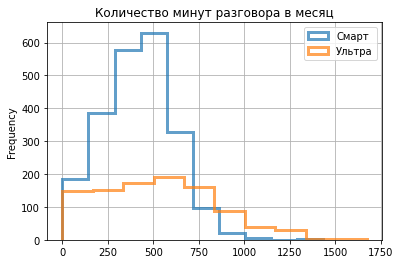

In [50]:
#построение гистограмм 
ax = smart.plot(kind='hist',
                y='duration',
                histtype='step',
                linewidth=3,
                alpha=0.7,
                label='Смарт',
                title='Количество минут разговора в месяц')
ultra.plot(kind='hist',
           y='duration',
           histtype='step',
           linewidth=3,
           alpha=0.7,
           label='Ультра',
           ax=ax,
           grid=True)

* Для пользователей тарифа "Смарт" среднее количество минут разговора в месяц - 418 при 500 минутах, включенных в пакет тарифа, а для пользователей тарифа "Ультра" среднее количество - 526 при 3000 минутах, включенных в пакет. 
* По гистограмме можно сделать вывод, что пользователям тарифа "Смарт" часто не хватает минут разговора пакета, тогда как пользователи тарифа "Ультра" к дополнительной покупке минут почти не прибегают. 
* Обе гистограммы близки к нормальному распределению.
* По правилу трех сигм, большинство значений (около 99%) времени разговора в месяц для тарифа "Смарт" находятся в промежутке (0, 989), для тарифа "Ультра" в промежутке (0, 1480).

### Количество сообщений

Вычислим среднее количество, дисперсию и стандартное отклонение для каждого тарифа.

* Тариф "Смарт"

In [51]:
#среднее количество сообщений для тарифа "Смарт"
smart['messages'].mean()

33.36905829596412

In [52]:
#дисперсия для тарифа "Смарт"
np.var(smart['messages'], ddof=1)

796.9552557301129

In [53]:
#стандартное отклонение для тарифа "Смарт"
np.std(smart['messages'], ddof=1)

28.230395954185852

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Смарт".

In [54]:
print(smart['messages'].mean() - 3 * np.std(smart['messages'], ddof=1), 
      smart['messages'].mean() + 3 * np.std(smart['messages'], ddof=1))

-51.32212956659343 118.06024615852168


Количество сообщений - неотрицательное число, промежуток, в котором лежит около 99% значений - (0, 118).

* Тариф "Ультра"

In [55]:
#среднее количество сообщений для тарифа "Ультра"
ultra['messages'].mean()

49.31338742393509

In [56]:
#дисперсия для тарифа "Ультра"
np.var(ultra['messages'], ddof=1)

2285.4174246558414

In [57]:
#стандартное отклонение для тарифа "Ультра"
np.std(ultra['messages'], ddof=1)

47.80603962530092

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Ультра".

In [58]:
print(ultra['messages'].mean() - 3 * np.std(ultra['messages'], ddof=1), 
      ultra['messages'].mean() + 3 * np.std(ultra['messages'], ddof=1))

-94.10473145196767 192.73150629983786


Промежуток, в котором лежит около 99% значений - (0, 193).

Построим гистограммы для количества сообщений в месяц пользователей каждого тарифа.

<AxesSubplot:title={'center':'Количество сообщений в месяц'}, ylabel='Frequency'>

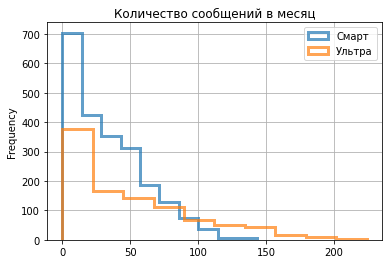

In [59]:
#построение гистограмм 
ax = smart.plot(kind='hist',
                y='messages',
                histtype='step',
                linewidth=3,
                alpha=0.7,
                label='Смарт',
                title='Количество сообщений в месяц')
ultra.plot(kind='hist',
           y='messages',
           histtype='step',
           linewidth=3,
           alpha=0.7,
           label='Ультра',
           ax=ax,
           grid=True)

* Для пользователей тарифа "Смарт" среднее количество сообщений в месяц - 33 при 50 сообщениях, включенных в пакет тарифа, а для пользователей тарифа "Ультра" среднее количество - 49 при 1000 сообщениях, включенных в пакет. 
* По гистограмме можно сделать вывод, что пользователям тарифа "Смарт" часто не хватает количества сообщений пакета, тогда как пользователи тарифа "Ультра" к дополнительной покупке сообщений почти не прибегают. 
* Обе гистограммы близки к распределению Пуассона.
* По правилу трех сигм, большинство значений (около 99%) количества сообщений в месяц для тарифа "Смарт" находятся в промежутке (0, 118), для тарифа "Ультра" в промежутке (0, 193).

### Количество интернет-трафика

Вычислим среднее количество, дисперсию и стандартное отклонение для каждого тарифа.

* Тариф "Смарт"

In [60]:
#среднее количество трафика для тарифа "Смарт"
smart['mb_used'].mean()

16201.118654708522

In [61]:
#дисперсия для тарифа "Смарт"
np.var(smart['mb_used'], ddof=1)

34564843.48129716

In [62]:
#стандартное отклонение для тарифа "Смарт"
np.std(smart['mb_used'], ddof=1)

5879.187314697258

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Смарт".

In [63]:
print(smart['mb_used'].mean() - 3 * np.std(smart['mb_used'], ddof=1), 
      smart['mb_used'].mean() + 3 * np.std(smart['mb_used'], ddof=1))

-1436.4432893832545 33838.680598800296


Количество трафика - неотрицательное число, промежуток, в котором лежит около 99% значений - (0, 33839).

* Тариф "Ультра"

In [64]:
#среднее количество трафика для тарифа "Ультра"
ultra['mb_used'].mean()

19449.059969574035

In [65]:
#дисперсия для тарифа "Смарт"
np.var(ultra['mb_used'], ddof=1)

102032129.46482122

In [66]:
#стандартное отклонение для тарифа "Смарт"
np.std(ultra['mb_used'], ddof=1)

10101.095458653048

Найдем по правилу трех сигм промежуток, в котором лежит большинство значений для тарифа "Ультра".

In [67]:
print(ultra['mb_used'].mean() - 3 * np.std(ultra['mb_used'], ddof=1), 
      ultra['mb_used'].mean() + 3 * np.std(ultra['mb_used'], ddof=1))

-10854.226406385107 49752.34634553318


Промежуток, в котором лежит около 99% значений - (0, 49752).

Построим гистограммы для количества интернет-трафика в мегабайтах в месяц пользователей каждого тарифа.

<AxesSubplot:title={'center':'Количество интернет-трафика в месяц'}, ylabel='Frequency'>

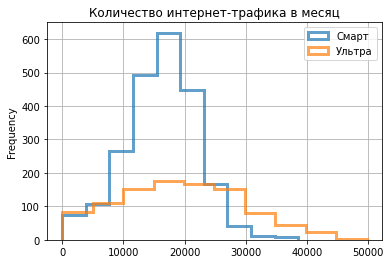

In [68]:
#построение гистограмм 
ax = smart.plot(kind='hist',
                y='mb_used',
                histtype='step',
                linewidth=3,
                alpha=0.7,
                label='Смарт',
                title='Количество интернет-трафика в месяц')
ultra.plot(kind='hist',
           y='mb_used',
           histtype='step',
           linewidth=3,
           alpha=0.7,
           label='Ультра',
           ax=ax,
           grid=True)

* Для пользователей тарифа "Смарт" среднее количество трафика в мегабайтах в месяц - 16201 при 15 Гб (15360 Мб), включенных в пакет тарифа, а для пользователей тарифа "Ультра" среднее количество - 19449 при 30 Гб (30720 Мб), включенных в пакет. 
* По гистограмме можно сделать вывод, что пользователям тарифа "Смарт" очень часто не хватает количества трафика пакета, пользователи тарифа "Ультра" тоже довольно часто вынуждены покупать дополнительный трафик. 
* Обе гистограммы близки к нормальному распределению.
* По правилу трех сигм, большинство значений (около 99%) количества интернет-трафика в мегабайтах в месяц для тарифа "Смарт" находятся в промежутке (0, 33839), для тарифа "Ультра" в промежутке (0, 49752).

### Вывод

На данном шаге было описано поведение клиентов, проанализировано необходимое пользователям каждого тарифа количество минут разговора, сообщений и интернет-трафика в месяц. Было обнаружено, что пользователям тарифа "Смарт" часто не хватает количества минут и сообщений, но чаще всего не хватает трафика, тогда как пользователи тарифа "Ультра" не нуждаются в дополнительных минутах или сообщениях, но иногда им не хватает количества интернет-трафика.

## Проверка гипотез

На данном этапе будут проверены две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем гипотезы:
* Нулевая гипотеза: Средняя выручка пользователей тарифа "Смарт" равна средней выручке пользователей тарифа "Ультра".
* Альтернативная гипотеза: Средняя выручка пользователей тарифа "Смарт" не равна средней выручке пользователей тарифа "Ультра".

Так как сравниваются средние двух генеральных совокупностей, а данные по тарифам "Смарт" и "Ультра" - это не зависящие друг от друга выборки, то будем проверять гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind()`.

In [69]:
from scipy import stats as st
#критический уровень статистической значимости
alpha = 0.05
#проверка гипотезы
results = st.ttest_ind(smart['total_income'], ultra['total_income'])
#вывод p-value
print('p-value:', results.pvalue)
#если p-value < alpha, то нулевую гипотезу отвергаем, иначе отвергнуть не можем
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 8.081909555489933e-161
Отвергаем нулевую гипотезу


p-value меньше критического уровня статистической значимости, значит, нулевую гипотезу, что средние выручки пользователей тарифа "Смарт" и "Ультра" равны, отвергаем. Следовательно, средняя выручка пользователей тарифа "Смарт" и средняя выручка пользователей тарифа "Ультра" различаются.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:
* Нулевая гипотеза: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
* Альтернативная гипотеза: Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Так как сравниваются средние двух генеральных совокупностей, а данные по Москве и другим регионам - это не зависящие друг от друга выборки, то будем проверять гипотезу о равенстве средних двух генеральных совокупностей с помощью метода `scipy.stats.ttest_ind()`.

In [70]:
#критический уровень статистической значимости
alpha = 0.05
#проверка гипотезы
results = st.ttest_ind(income[income['city']=='Москва']['total_income'], 
                       income[income['city']!='Москва']['total_income'])
#вывод p-value
print('p-value:', results.pvalue)
#если p-value < alpha, то нулевую гипотезу отвергаем, иначе отвергнуть не можем
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


p-value больше критического уровня статистической значимости, значит, нулевую гипотезу, что средние выручки пользователей из Москвы и из других регионов равны, отвергнуть нельзя. Следовательно, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не различаются.

### Вывод

Были сформулированы нулевые и альтернативные гипотезы, задан критический уровень статистической значимости. Были сделаны следующие выводы:
* Средняя выручка пользователей тарифа "Смарт" и средняя выручка пользователей тарифа "Ультра" различаются.
* Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не различаются.

## Общий вывод

В ходе данного исследования были изучены данные 500 пользователей оператора сотовой связи "Мегалайн" за 2018 год. Данные были подготовлены, приведены к нужным типам, изучены на предмет наличия ошибок. 

Для каждого пользователя были посчитаны:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячная выручка с каждого пользователя.

Было проанализировано поведение клиентов опрератора, а именно минуты разговора, количество сообщений и объём интернет-трафика, необходимые в месяц, были посчитаны среднее, дисперсия, стандартное отклонение для каждого параметра и построены гистограммы. Также по правилу трех сигм были определены отрезки, в которых лежит большинство значений. Было обнаружено, что пользователям тарифа "Смарт" часто не хватает количества минут и сообщений, и очень часто не хватает объёма интернет-трафика, тогда как пользователи тарифа "Ультра" не нуждаются в дополнительных минутах или сообщениях, но иногда им не хватает количества интернет-трафика.

Были проверены следующие гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются:

После проверки гипотезы о равенстве среднего двух генеральных совокупностей нулевая гипотеза о равенстве средних выручек двух тарифов была отвергнута. Следовательно, средняя выручка пользователей тарифа "Смарт" и средняя выручка пользователей тарифа "Ультра" различаются.

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:

После проверки гипотезы о равенстве среднего двух генеральных совокупностей нулевую гипотезу о равенстве средних выручек пользователей из Москвы и из других регионов не получилось отвергнуть. Следовательно, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов не различаются.

В ходе данного исследования был сделан вывод, что тариф "Ультра" приносит компании "Мегалайн" большую выручку в месяц, чем тариф "Смарт". Но большинство пользователей тарифа "Ультра" использует менее 1480 минут в месяц при предоставленных 3000 минут в пакете и менее 193 сообщений при 1000 сообщениях в пакете, так что возможно условия тарифа следует подкорректирвать, как и условия тарифа "Смарт", где пользователям часто не хватает количества минут, сообщений и интернет-трафика.